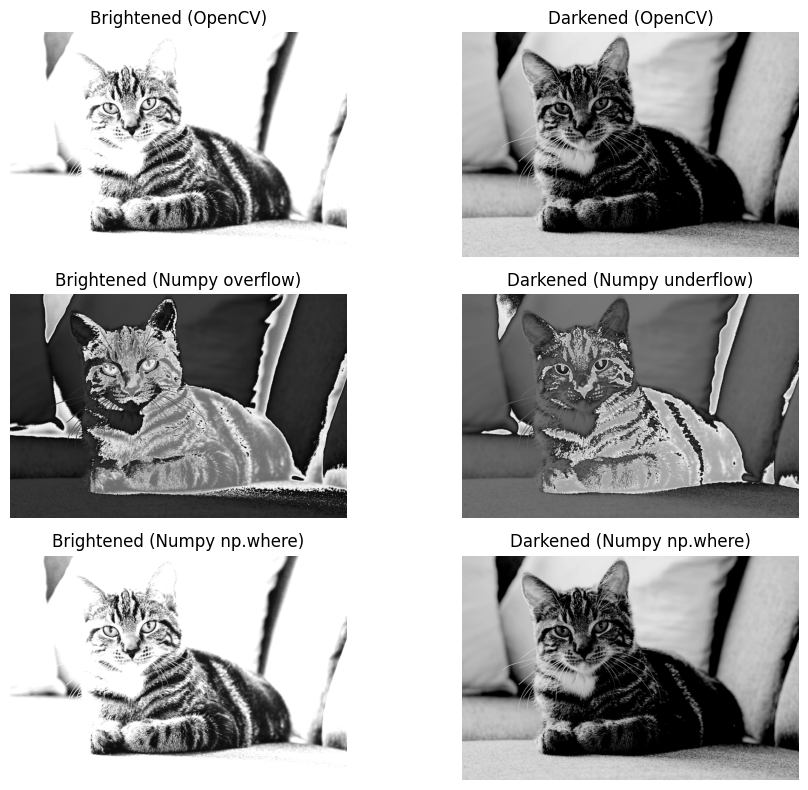

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict  # OrderedDict 임포트

# 이미지를 회색조(그레이스케일)로 읽기
image = cv2.imread("example.jpg", cv2.IMREAD_GRAYSCALE)

# OpenCV 함수 이용
dst1 = cv2.add(image, 100)  # 영상 밝게 (saturation 방식)
dst2 = cv2.subtract(image, 100)  # 영상 어둡게
# numpy array 이용
dst3 = image + 100  # 영상 밝게 (overflow 발생)
dst4 = image - 100  # 영상 어둡게 (underflow 발생)

# numpy array 이용
# 영상 밝게 (최대 최소 제한) 
dst5 = np.where(image > 255 - 100, 255, image + 100)
# 영상 어둡게 (최대 최소 제한) 
dst6 = np.where(image < 100, 0, image - 100)

# 순서가 있는 딕셔너리로 이미지와 제목 정의
images = OrderedDict([
    ('Brightened (OpenCV)', dst1),
    ('Darkened (OpenCV)', dst2),
    ('Brightened (Numpy overflow)', dst3),
    ('Darkened (Numpy underflow)', dst4),
    ('Brightened (Numpy np.where)', dst5),
    ('Darkened (Numpy np.where)', dst6)
])

# 서브플롯 개수 정의 (6개 이미지를 출력)
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3x2 그리드 서브플롯

# axes를 flatten하여 1차원 배열로 변환
axes = axes.flatten()

# 순서 있는 딕셔너리에서 이미지와 제목을 반복하며 출력
for i, (title, img) in enumerate(images.items()):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')  # 모든 서브플롯에 대해 axis('off') 적용
pass

# 레이아웃 조정
plt.tight_layout()
plt.show()